# Partitioning and Extraction

Identifying groups or attributes within a network is crucial, especially in friendship networks or social media networks. This process is referred to as **partitioning** and **extraction**, and it is a **powerful method for discovering specific communities or attributes**. Here, we explain its significance.

First, let's consider a friendship network. Friendships at school or in the workplace often form multiple small groups. By identifying these groups, we can understand who is close to whom and which groups play central roles. Such analysis helps to grasp the structure of the community, aiding in efficient information sharing or event planning.

In a social media network, it is possible to extract groups with common interests or concerns based on the accounts users follow or the posts they "like." Partitioning and extraction in graph theory are powerful means for identifying groups or attributes within a network. **Partitioning** involves dividing the network into **multiple subgraphs** by partitioning the graph, making it possible to find groups of friends or users with shared interests within a social network. However, appropriate constraints are necessary to derive correct solutions.

On the other hand, **extraction** in graphs refers to selecting nodes or edges with specific attributes and extracting the set of nodes with those characteristics or the edges between them to **generate a new graph**. This method is useful for analyzing the behavior patterns of users with certain attributes, though the extracted subgraphs may vary depending on the purpose or interest of the analysis. Unlike partitioning, extraction does not predefine the number or size of the partitions, and extracting dense parts of the network is referred to as community extraction.

Choosing the appropriate algorithm for **partitioning or extraction based on the characteristics and purpose of the network is crucial**. Additionally, interpreting the results requires **background knowledge of the target network**. To evaluate the adequacy of the partitioning, it is common to compute modularity. **Modularity** evaluates the success of community extraction by taking the network and the communities to which each vertex belongs as input.

**1. Partitioning:** Dividing a graph into several parts. Each part typically consists of a set of nodes, aiming to minimize the number of edges between parts and maximize the number of edges within each part. This is part of community detection.

**2. Extraction:** Extracting specific subgraphs or sets of nodes from a graph. Community extraction refers to identifying tightly connected sets of nodes (communities) within a graph.

**3. Community Detection:** The process of finding communities within a graph, that is, groups of nodes that are densely connected. It is a broad concept that includes both partitioning and extraction.

This script creates a graph with two cycles connected by edges. It then verifies the validity of the specified partitions and creates a map showing which partition each node belongs to. The script checks whether nodes 0 and 7 belong to the same partition, and finally, it visualizes the original graph and the partitioned graph, color-coded by partition, in subplots.

The goal of the script is to create and visualize the graph’s structure and verify the validity of the specified partitions. Additionally, it aims to create a map showing which partition each node belongs to and provide a console output and visual understanding of whether specific nodes are in the same partition.

Is partition valid? True
Partition Map:
{1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 0: 2, 7: 2}
Are node 0 and node 7 in the same partition? True


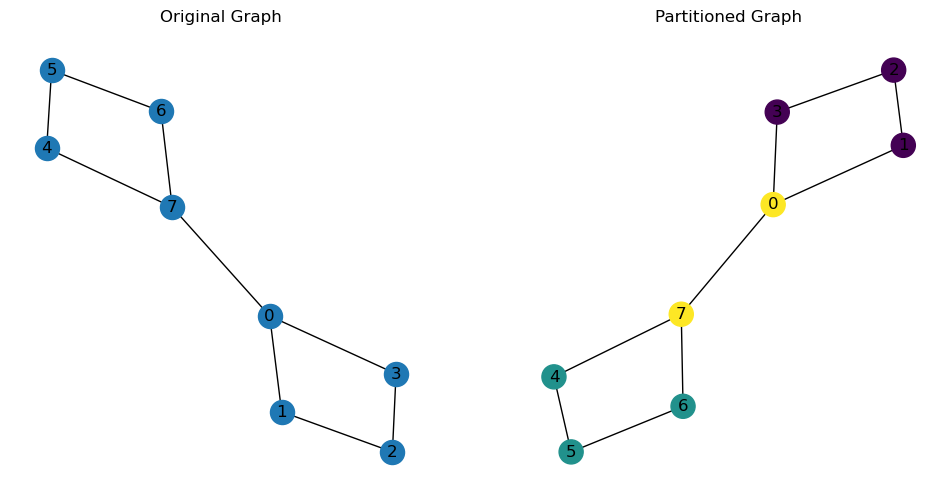

In [1]:
import random
import matplotlib.pyplot as plt
import networkx as nx

# Create the graph
G = nx.Graph()
nx.add_cycle(G, [0, 1, 2, 3])
nx.add_cycle(G, [4, 5, 6, 7])
G.add_edge(0, 7)

# Plot the graph
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Draw the original graph
nx.draw(G, with_labels=True, ax=axes[0])
axes[0].set_title("Original Graph")

# Create partitions
partition = [
    {1, 2, 3},
    {4, 5, 6},
    {0, 7},
]

# Validate the partition
is_partition = nx.community.is_partition(G, partition)
print(f"Is partition valid? {is_partition}")

# Create a partition map
partition_map = {}
for idx, cluster_nodes in enumerate(partition):
    for node in cluster_nodes:
        partition_map[node] = idx

print("Partition Map:")
print(partition_map)

# Check if nodes are in the same partition
same_partition = partition_map[0] == partition_map[7]
print(f"Are node 0 and node 7 in the same partition? {same_partition}")

# Set node colors based on partitions
node_colors = [partition_map[n] for n in G.nodes]

# Draw the graph with partition colors
nx.draw(G, node_color=node_colors, with_labels=True, ax=axes[1])
axes[1].set_title("Partitioned Graph")

# Show the plot
plt.show()


---
## Kernighan-Lin Algorithm
The **Kernighan-Lin algorithm** is a heuristic algorithm for graph partitioning, proposed by Brian W. Kernighan and Shen Lin in 1970. This algorithm is especially used for community detection and structural analysis of networks. The basic idea is to **partition the nodes of the graph into two groups, minimizing the number of edges between them.**

First, the nodes of the graph are randomly divided into two groups. Then, by repeatedly moving nodes between groups, the number of edges crossing the partition is reduced. The algorithm calculates the difference (cost) between the number of edges added and the number of edges removed by each move, and proceeds in a way that reduces the overall cost. This process continues until the optimal partition is achieved.

The flow of calculation is as follows. First, **the initial placement of each node is determined**. Then, the cost associated with moving each node is calculated, and the move with the lowest (or most reduced) cost is selected. This is repeated for all nodes in the group, and the move that minimizes the overall cost is determined. The algorithm ends when the overall cost reaches its minimum.

Let’s explain this algorithm using a simple example. Consider a situation where you want to divide a group of friends into two teams. Everyone wants to be on the same team as their friends, but the teams need to be balanced in size. After initially dividing the group into two random teams, members are swapped to preserve as many friendships as possible. This swapping process is repeated, and the final result is two teams with the highest number of preserved friendships. This is the concept behind the Kernighan-Lin algorithm.

An example of the application of the Kernighan-Lin algorithm is in the analysis of social networks. For instance, it is used to analyze user networks on Facebook or Twitter to discover natural communities or groups. It is also applied in areas such as VLSI design and load balancing, where efficient partitioning of complex networks is required.

<br>
The input to the algorithm in the following script is an undirected graph G with a vertex set V, an edge set E, and optionally, numerical weights on the edges of E. The goal of the algorithm is to partition V into two disjoint subsets A and B of equal (or nearly equal) size, minimizing the total weight T of the subset of edges from A to B. If the graph is unweighted, the goal is to minimize the number of crossing edges instead.

### Algorithm Overview
1. **Initial Partition**<br>
    ・ Randomly or based on certain criteria, divide the vertices of the graph into two subsets, A and B. <br>

2. **Create Adjacency List**<br>
    ・ For each vertex, record the number of connections to vertices in the other subset. <br>

3. **Swap Step**<br>
    ・ At each step, select one vertex from subset A and one vertex from subset B and swap them. Evaluate the change in edge cuts after the swap. If the number of cuts decreases, perform the swap. <br>
    ・ Repeat this process until all vertex swaps are attempted. <br>

4. **Recursive Improvement**<br>
    ・ Once the swap step is complete, recursively repeat the process until the overall edge cut is minimized. <br>

### Advantages of the Kernighan-Lin Algorithm
**Intuitive Understanding of Bipartite Graph Partitioning**<br>
・ The Kernighan-Lin algorithm aims to minimize cut size when partitioning a graph into two parts. <br>
・ Visualization allows an intuitive understanding of how the algorithm splits the graph into two parts and which nodes are moved to which part at each step. <br>

**Visualization of Swap Effects**<br>
・ The Kernighan-Lin algorithm improves the partition balance by swapping pairs of nodes. Visualizing the process allows for a concrete understanding of how each swap affects the overall partition cost. <br>

**Monitoring the Convergence Process**<br>
・ By visualizing the changes in partition cost and balance at each step, it becomes easier to understand the convergence process of the algorithm. <br>

**Evaluating the Quality of the Partition**<br>
・ Visualizing the result of the graph partition allows for easier evaluation of the partition quality. Specifically, by visually comparing the number of internal and external edges in the bipartite graph, the partition quality can be quantitatively assessed. <br>
<br><br>
The script below demonstrates the process of applying the Kernighan-Lin algorithm to find the optimal partition of a network and visualize it.<br>
**1. Creating the Graph**<br>
・ Use `nx.karate_club_graph()` to create a graph of the Karate club. <br>
**2. Setting the Initial Partition**<br>
・ Convert the graph’s nodes into a list, divide the list in half, and split it into two subsets. These subsets are used as the initial partition. <br>
**3. Coloring the Initial Partition**<br>
・ Based on the initial partition, color each node. In this script, three colors (red, blue, green) are used for coloring. <br>
**4. Visualizing the Initial Partition**<br>
・ Visualize the graph with the initial partition. The nodes are displayed in colors based on the initial partition, and the edges are shown in black. <br>
**5. Applying the Kernighan-Lin Algorithm**<br>
・ Use the `kernighan_lin_bisection()` function to calculate the optimal partition based on the initial partition. This algorithm splits the graph into two parts while minimizing edge cuts. <br>
**6. Coloring the Optimal Partition**<br>
・ Recolor each node based on the optimal partition. <br>
**7. Visualizing the Optimal Partition**<br>
・ Visualize the graph again with the optimal partition. The nodes are displayed in colors based on the optimal partition, and the edges are shown in black. <br>
**8. Calculating Modularity and Cut Size of the Optimal Partition**<br>
・ Calculate the modularity and cut size of the optimal partition. <br>
<br><br>
The input to the algorithm in the script consists of the vertex set V, the edge set E, and optionally an undirected graph G with numerical weights on the edges of E. The goal of the algorithm is to partition V into two disjoint subsets A and B of equal (or nearly equal) size, minimizing the total weight T of the subset of edges from A to B. If the graph is unweighted, the goal is to minimize the number of crossing edges instead.

Initial Partition: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}, {32, 33, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}]
Initial Modularity: 0.2914488109293305
Initial Cut Size: 20
Optimal Modularity: 0.3998332115215232
Optimal Cut Size: 10


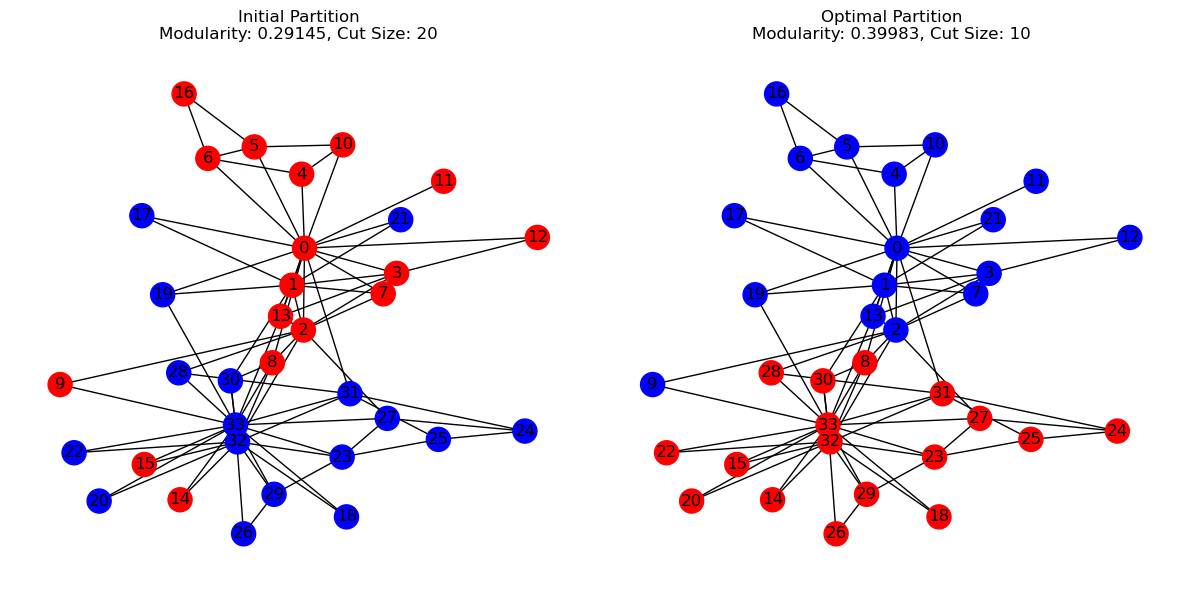

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import kernighan_lin_bisection
from networkx.algorithms.community.quality import modularity

# Create the graph
G = nx.karate_club_graph()
colors = ['red', 'blue', 'green']
pos = nx.spring_layout(G)

# Set the initial partition (Zachary's Karate Club can be divided into two based on attributes or centrality, so we set it to 2)
init_nodes = list(G.nodes())
init_partition = [set(init_nodes[:len(init_nodes)//2]), set(init_nodes[len(init_nodes)//2:])]
print("Initial Partition:", init_partition)

# Color the initial partition
color_map_i = ['black'] * len(G)
counter = 0
for c in init_partition:
    for n in c:
        color_map_i[n] = colors[counter]
    counter += 1

# Apply the Kernighan-Lin algorithm
lst_b = kernighan_lin_bisection(G, partition=init_partition)
color_map_b = ['black'] * len(G)
counter = 0
for c in lst_b:
    for n in c:
        color_map_b[n] = colors[counter]
    counter += 1

# Calculate the modularity and cut size of the initial partition
initial_modularity = modularity(G, init_partition)
initial_cut_size = nx.cut_size(G, init_partition[0], init_partition[1])
print(f"Initial Modularity: {initial_modularity}")
print(f"Initial Cut Size: {initial_cut_size}")

# Calculate the modularity and cut size of the optimal partition
optimal_modularity = modularity(G, lst_b)
optimal_cut_size = nx.cut_size(G, lst_b[0], lst_b[1])
print(f"Optimal Modularity: {optimal_modularity}")
print(f"Optimal Cut Size: {optimal_cut_size}")

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Visualize the initial partition
nx.draw_networkx_edges(G, pos, ax=axs[0])
nx.draw_networkx_nodes(G, pos, node_color=color_map_i, ax=axs[0])
nx.draw_networkx_labels(G, pos, ax=axs[0])
axs[0].axis('off')
axs[0].set_title("Initial Partition\nModularity: {:.5f}, Cut Size: {}".format(initial_modularity, initial_cut_size))

# Visualize the optimal partition
nx.draw_networkx_edges(G, pos, ax=axs[1])
nx.draw_networkx_nodes(G, pos, node_color=color_map_b, ax=axs[1])
nx.draw_networkx_labels(G, pos, ax=axs[1])
axs[1].axis('off')
axs[1].set_title("Optimal Partition\nModularity: {:.5f}, Cut Size: {}".format(optimal_modularity, optimal_cut_size))

# Show plot
plt.tight_layout()
plt.show()


### Supplementary Note
The above script uses the modularity function as a measure of the effectiveness of the partitioning. Generally, higher modularity values indicate better partitions, but it is crucial to assess not just the modularity value itself, but also how well the partitioning aligns with the actual community structure and expected characteristics within the network. Even if a partition with high modularity is obtained, it is important to carefully evaluate how well the resulting communities reflect the original network's structure and whether they are grouped based on specific attributes.

---

## Clustering results change depending on the initial partition.
・The initial partition assumes the degree of the nodes to be 4 for partitioning. <br>
・This partitioning is based on centrality or attributes. <br>

Initial Modularity: -0.05445924926444404
Initial Cut Size: 47
Optimal Modularity: 0.3045670058657073
Optimal Cut Size: 15


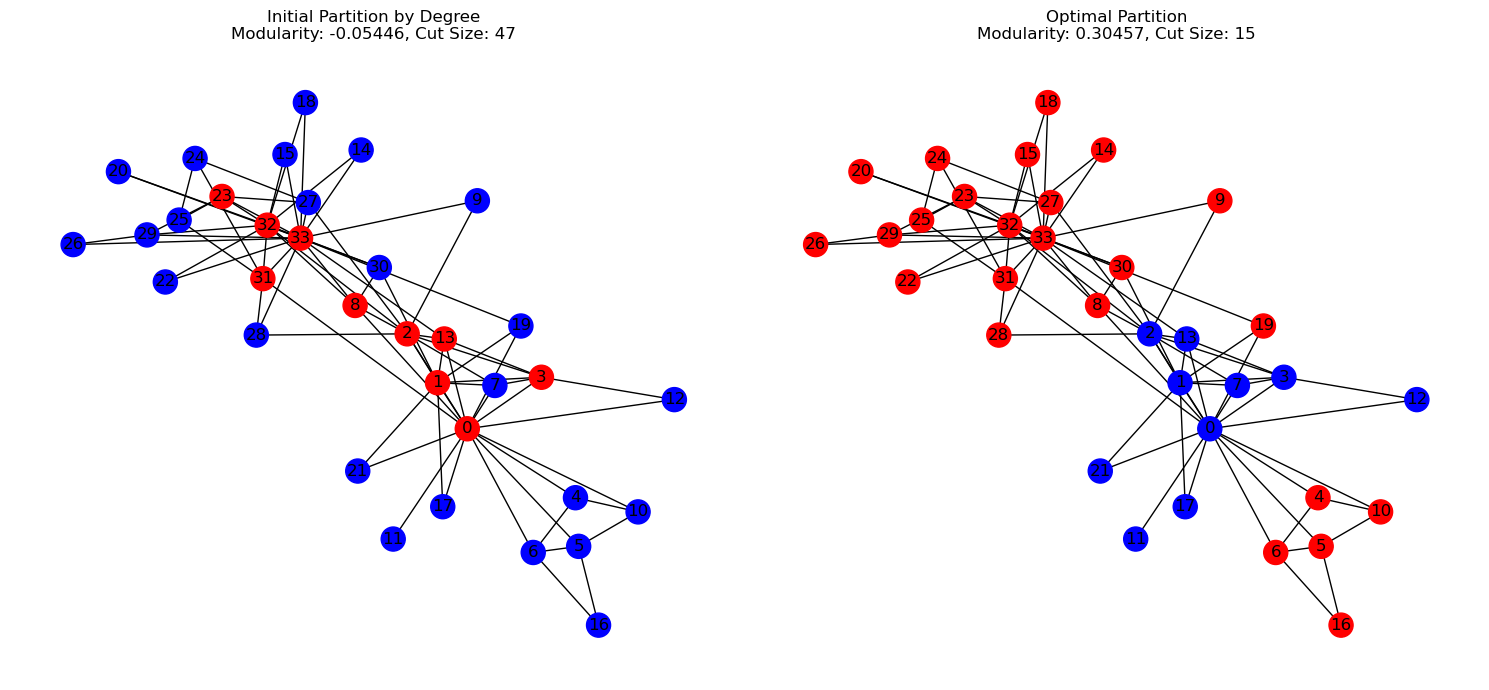

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import kernighan_lin_bisection
from networkx.algorithms.community.quality import modularity

# Create the graph
G = nx.karate_club_graph()
colors = ['red', 'blue', 'green']
pos = nx.spring_layout(G)

# Initial partition based on specific attributes (e.g., partition by node degree)
high_degree_nodes = {n for n, d in G.degree() if d > 4}
low_degree_nodes = set(G.nodes()) - high_degree_nodes
init_partition = [high_degree_nodes, low_degree_nodes]

# Color the initial partition
color_map_i = ['black'] * len(G)
counter = 0
for c in init_partition:
    for n in c:
        color_map_i[n] = colors[counter]
    counter += 1

# Calculate the modularity and cut size of the initial partition
initial_modularity = modularity(G, init_partition)
initial_cut_size = nx.cut_size(G, init_partition[0], init_partition[1])
print(f"Initial Modularity: {initial_modularity}")
print(f"Initial Cut Size: {initial_cut_size}")

# Apply the Kernighan-Lin algorithm
lst_b = kernighan_lin_bisection(G, partition=init_partition)
color_map_b = ['black'] * len(G)
counter = 0
for c in lst_b:
    for n in c:
        color_map_b[n] = colors[counter]
    counter += 1

# Calculate the modularity and cut size of the optimal partition
optimal_modularity = modularity(G, lst_b)
optimal_cut_size = nx.cut_size(G, lst_b[0], lst_b[1])
print(f"Optimal Modularity: {optimal_modularity}")
print(f"Optimal Cut Size: {optimal_cut_size}")

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Visualize the initial partition
axs[0].set_title("Initial Partition by Degree\nModularity: {:.5f}, Cut Size: {}".format(initial_modularity, initial_cut_size))
nx.draw_networkx_edges(G, pos, ax=axs[0])
nx.draw_networkx_nodes(G, pos, node_color=color_map_i, ax=axs[0])
nx.draw_networkx_labels(G, pos, ax=axs[0])
axs[0].axis('off')

# Visualize the optimal partition
axs[1].set_title("Optimal Partition\nModularity: {:.5f}, Cut Size: {}".format(optimal_modularity, optimal_cut_size))
nx.draw_networkx_edges(G, pos, ax=axs[1])
nx.draw_networkx_nodes(G, pos, node_color=color_map_b, ax=axs[1])
nx.draw_networkx_labels(G, pos, ax=axs[1])
axs[1].axis('off')

# Show plot
plt.tight_layout()
plt.show()


---

## Spectral Partitioning
**Spectral Partitioning** is a method of graph partitioning that aims to **minimize the number of edge cuts when dividing the vertices of a graph into two or more parts.** This method utilizes the eigenvalues and eigenvectors of the graph's Laplacian matrix (a matrix constructed using the degrees of vertices and the adjacency matrix).<br>

First, let's explain the basic idea behind spectral partitioning. The eigenvalues of the graph's Laplacian matrix are calculated, and the eigenvector corresponding to the second smallest eigenvalue, known as the "Fiedler vector," is obtained. Using this Fiedler vector, the vertices are divided into two groups. Specifically, the vertices with positive values in the Fiedler vector are assigned to one group, while those with negative values are assigned to the other. This process allows the graph to be divided into two parts while minimizing edge cuts.<br>

To illustrate this algorithm with a familiar example, consider a situation where you want to divide all students in a school class into two groups. You can represent friendships between students as edges and aim to divide the class such that as many friends as possible are in the same group. Spectral partitioning uses the friendship information to create a Laplacian matrix, and the eigenvalues and eigenvectors of this matrix are used to divide the students into two groups. This minimizes the number of friendships that are split between groups.<br>

Applications of spectral partitioning include image segmentation and clustering. In image segmentation, this method is used to divide an image into multiple regions. In clustering, it is used to efficiently group large datasets. Additionally, spectral partitioning is applied in the analysis of social networks to divide users into natural communities.<br>

### Algorithm Overview
1. **Graph Representation**<br>
・A graph 𝐺 consists of a set of vertices 𝑉 and a set of edges 𝐸.<br>
・𝐴 represents the adjacency matrix of the graph, where $A_{ij} = 1$ if vertices 𝑖 and 𝑗 are connected by an edge, and $A_{ij} = 0$ otherwise.<br>
2. **Laplacian Matrix**<br>
・The Laplacian matrix 𝐿 is defined as 𝐿 = 𝐷 − 𝐴, where 𝐷 is the degree matrix, a diagonal matrix that contains the degree of each vertex.<br>
3. **Eigenvalues and Eigenvectors**<br>
・The eigenvalues and eigenvectors of the Laplacian matrix 𝐿 are computed. These values characterize the matrix, and in particular, the eigenvector corresponding to the second smallest eigenvalue (known as the "Fiedler vector") contains important information for identifying a natural partition of the graph.<br>
4. **Partitioning Using the Fiedler Vector**<br>
・The vertices are divided into two groups based on the sign of the Fiedler vector, which serves as an effective partitioning criterion.<br>
5. **Cut Size**<br>
・Spectral partitioning is designed to minimize the number of edges between clusters, thereby minimizing the connectivity between the resulting parts of the graph.<br>

### Advantages of Spectral Partitioning
**Intuitive Understanding of Partitioning**<br>
・Spectral partitioning divides the nodes of the graph using the eigenvectors of the Laplacian matrix. Visualization allows for an intuitive understanding of which nodes belong to which part, making it easier to verify the partitioning results visually.<br>
**Understanding Clustering Structure**<br>
・Spectral partitioning is used to divide the graph into clusters. Visualization allows for a clearer understanding of the internal structure of each cluster and the relationships between clusters, making it easier to evaluate the quality of the clustering.<br>
**Understanding Eigenvectors**<br>
・Visualizing the partitioning process using eigenvectors makes it easier to understand how the eigenvectors determine the positions and partitioning of nodes. In particular, plotting the eigenvectors in two- or three-dimensional space visually reveals the structure of the graph.<br>
**Evaluating Partition Quality**<br>
・Through visualization, the quality of the partition can be evaluated. For example, by coloring or shaping nodes to represent clusters, the density within clusters and the number of edges between clusters can be visually assessed, allowing for a quantitative understanding of the effectiveness of the partitioning.<br>

### Applications of Spectral Partitioning
・ **Community Detection:** Detecting dense areas within a network and partitioning nodes into clusters.<br>
・ **Data Clustering:** Partitioning large datasets into groups to discover patterns and structures.<br>
・ **Image Segmentation:** Dividing an image into different regions to identify objects or areas.<br>

<br>
The script below demonstrates how to perform spectral partitioning on the Karate Club graph and visually understand the graph’s structure.<br>

1. **Graph Creation**<br>
・ Create a graph called the Karate Club graph.<br>
2. **Retrieve Adjacency Matrix**<br>
・ Use `nx.adjacency_matrix()` to retrieve the adjacency matrix of graph G and convert it to floating-point numbers.<br>
3. **Create Degree Matrix**<br>
・ Create a matrix D where the diagonal elements represent the degree of each node in the adjacency matrix A.<br>
4. **Compute Laplacian Matrix**<br>
・ Calculate the Laplacian matrix L by subtracting the adjacency matrix A from the degree matrix D.<br>
5. **Compute Eigenvalues and Eigenvectors of the Laplacian Matrix**<br>
・ Use `scipy.sparse.linalg.eigsh()` to compute the eigenvector (Fiedler vector) corresponding to the smallest non-zero eigenvalue of the Laplacian matrix L.<br>
6. **Partition Using the Fiedler Vector**<br>
・ Divide the nodes into two groups based on the sign of the Fiedler vector. This partitioning is based on spectral partitioning.<br>
7. **Evaluate the Partition (Modularity Calculation)**<br>
・ Use the `modularity()` function to calculate the modularity of the partition. Modularity is a measure of the quality of the partition.<br>
8. **Calculate Cut Size**<br>
・ Use the `cut_size()` function to calculate the cut size between the two groups.<br>
9. **Display Results**<br>
・ Output the modularity and cut size of the partition to the console.<br>
10. **Output Additional Values and Visualization**<br>
・ Display the Laplacian matrix L.<br>
・ Display the eigenvalues.<br>
・ Display the Fiedler vector.<br>
・ Visualize the graph (coloring nodes based on partitioning).<br>

### Supplementary Note
・`mod = modularity(groups, G)`: 'groups' represents the node groupings obtained through spectral partitioning, and 'G' is the target graph.<br>
・The `modularity()` function calculates the modularity of the given groupings ('groups'). This calculation is based on spectral partitioning.<br>

Partition Modularity: 0.3714661406969083
Cut Size: 10

Laplacian Matrix L:
[[42. -4. -5. ... -2.  0.  0.]
 [-4. 29. -6. ...  0.  0.  0.]
 [-5. -6. 33. ...  0. -2.  0.]
 ...
 [-2.  0.  0. ... 21. -4. -4.]
 [ 0.  0. -2. ... -4. 38. -5.]
 [ 0.  0.  0. ... -4. -5. 48.]]

Eigenvalues:
[-4.31107426e-15  1.18710730e+00]

Fiedler Vector:
[-0.1233171  -0.0580066  -0.01368446 -0.07445083 -0.26733837 -0.29881441
 -0.29744558 -0.06406144  0.0530052   0.12925543 -0.28550172 -0.20406685
 -0.12324309 -0.03493189  0.17156602  0.15520216 -0.37166422 -0.16804128
  0.21148231 -0.0625882   0.18847412 -0.1289233   0.16858175  0.14801794
  0.15762212  0.14632034  0.19249255  0.12982346  0.09449019  0.16960883
  0.08368282  0.1170647   0.13538405  0.12400534]


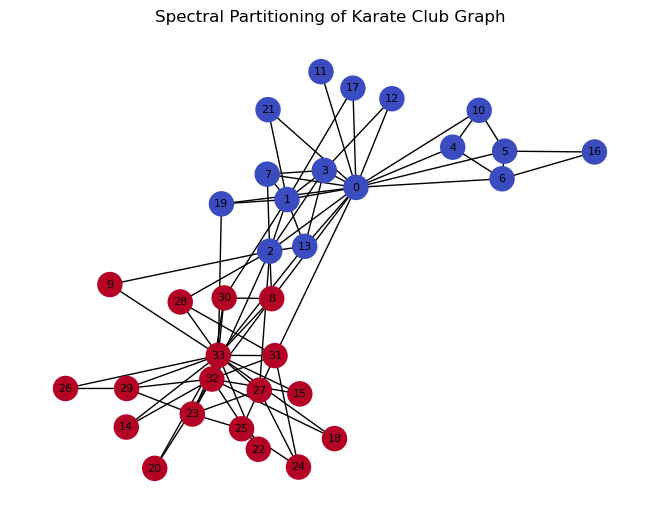

In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh

# Definition of the modularity function
def modularity(groups, G):
    m = G.number_of_edges()
    Q = 0
    for i in G.nodes:
        for j in G.nodes:
            if groups[i] == groups[j]:
                A_ij = 1 if G.has_edge(i, j) else 0
                k_i = G.degree[i]
                k_j = G.degree[j]
                Q += (A_ij - k_i * k_j / (2 * m))
    Q /= (2 * m)
    return Q

# Definition of the cut size calculation function
def cut_size(groups, G):
    cut_size = 0
    for i, j in G.edges:
        if groups[i] != groups[j]:
            cut_size += 1
    return cut_size

# Create the graph
G = nx.karate_club_graph()  # Using the Karate Club graph as an example dataset

# Retrieve adjacency matrix
A = nx.to_scipy_sparse_array(G).astype(float)

# Create degree matrix
D = np.diag(np.array(A.sum(axis=1)).flatten())

# Calculate Laplacian matrix
L = D - A

# Compute the eigenvalues and eigenvectors of the Laplacian matrix
eigvals, eigvecs = eigsh(L, k=2, which='SM')

# Get the eigenvector corresponding to the second smallest eigenvalue (Fiedler vector)
fiedler_vector = eigvecs[:, 1]

# Split the vertices into two groups based on the sign of the Fiedler vector
groups = fiedler_vector > 0

# Evaluate the partition (modularity calculation)
mod = modularity(groups, G)
print(f"Partition Modularity: {mod}")

# Calculate the cut size
cut = cut_size(groups, G)
print(f"Cut Size: {cut}")

# Output various values to the console
print("\nLaplacian Matrix L:")
print(L)  # Directly displaying the NumPy array

print("\nEigenvalues:")
print(eigvals)

print("\nFiedler Vector:")
print(fiedler_vector)

# Graph visualization
pos = nx.spring_layout(G)  # Compute graph layout
nx.draw(G, pos, with_labels=True, node_color=groups, cmap=plt.cm.coolwarm, node_size=300, font_size=8)
plt.title("Spectral Partitioning of Karate Club Graph")
plt.show()


---

## Louvain Method
The **Louvain method** is an algorithm for detecting communities (groups of tightly connected nodes) within a network. This method **starts with each node belonging to its own community and iteratively adjusts the position of each node.** Specifically, each node is temporarily removed from its current community, and its movement to neighboring communities is considered. If moving a node improves the overall modularity (a measure of the quality of the network division), the node is placed in the new community. This process is repeated for all nodes, continuing until modularity no longer changes, resulting in an optimal community structure.

Let’s explain how the Louvain method works with a familiar example. Imagine dividing students in a school class into friend groups. Initially, each student belongs to their own group. Then, the groups are reorganized so that friends gather together. Each student can change their group, with the goal of finding an arrangement where the most friendships are maintained. The groups are adjusted each time friendships increase, and the process is repeated until an optimal division of friends is achieved. This is the basic concept of the Louvain method.

The advantages of the Louvain method include its fast and scalable performance, as well as its ability to extract self-organized communities. This maximizes the overall modularity of the network and offers flexibility in applying the method to various types of networks. Additionally, it provides an intuitive community structure and allows for the analysis of network dynamics and temporal changes.

However, the Louvain method also has some drawbacks and points of caution. Because it uses a greedy optimization approach, it is prone to converging to local optima and does not always guarantee a global optimal solution. Furthermore, the community structure obtained may depend on the network’s initial state or structure, and in very large or dense networks, the computation time may increase. Additionally, interpreting the modularity value can be challenging, as a high modularity does not always indicate a meaningful community structure. These factors should be considered when applying the Louvain method and analyzing its results.

An example of the Louvain method’s application is the analysis of social networks. For instance, it is used to analyze user networks on platforms like Facebook and Twitter to discover natural communities or groups. It is also used in gene network analysis, market basket analysis, power grid optimization, and various other fields.

### Algorithm Overview
1. **Initialization**<br>
    ・Treat each node as an independent community.<br>
2. **Optimization Phase**<br>
    ・Move each node to a neighboring community and select the move that maximizes the modularity increase.<br>
    ・Repeat this process until no further modularity improvements are observed.<br>
3. **Aggregation Phase**<br>
    ・Merge nodes within the same community into a single super-node.<br>
    ・Construct a new network and adjust the edge weights between super-nodes accordingly.<br>
4. **Iteration**<br>
    ・Repeat the optimization and aggregation phases until no further modularity improvements are observed.<br>
5. **Final Result**<br>
    ・The final community structure from the last iteration is mapped back to the original network, providing the final result.<br>

### Advantages of the Louvain Method
**Community Detection**<br>
・The Louvain method is an effective technique for discovering communities (clusters) within a network. Visualization makes it easier to identify communities expressed in different colors or shapes, helping to understand the community structure within the network.<br>
**Tracking Dynamic Communities**<br>
・The Louvain method is a **dynamic technique** that can be applied to networks that change over time. Visualization allows for the tracking of community changes or movements at different points in time.<br>
**Evaluating Partition Quality**<br>
・The internal and external cohesion of the partitioned communities can be visually checked, allowing for an assessment of the quality of the partitioning.<br>
**Understanding Network Characteristics**<br>
・By visualizing the positions of nodes and the arrangement of edges, it is possible to grasp important structures and patterns within the network.<br>

The following script visualizes the Zachary Karate Club network, extracts the community structure using the Louvain method, and calculates its modularity.<br>

1. **Loading the Network**<br>
・ Use the `networkx` library to load the Zachary Karate Club network.<br>
2. **Extracting Communities**<br>
・ Apply the Louvain method using `greedy_modularity_communities` to extract the community structure of the network.<br>
・ This provides the communities to which each member of the network belongs.<br>
3. **Modularity Calculation**<br>
・ Use the `modularity` function to calculate the modularity of the extracted community structure.<br>
・ Modularity indicates how non-random the edge connections in the network are compared to a random network.<br>
・ The higher the value, the more the community structure in the network is emphasized.<br>
4. **Visualization**<br>
・ Use `matplotlib` to visualize the network.<br>
・ Each node is color-coded according to its community, and node labels are displayed.<br>
・ Edges between nodes are also drawn, helping to intuitively understand the overall structure of the network.<br>

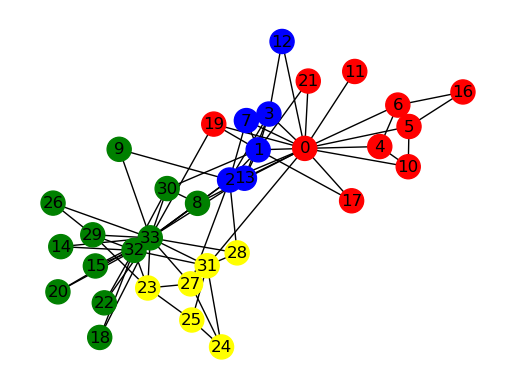

Modularity: 0.4277


In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import label_propagation_communities
import community as community_louvain

# Generate the Karate Club graph
G = nx.karate_club_graph()

# Define colors for the communities
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']

# Compute node positions using spring layout
pos = nx.spring_layout(G)

# Detect communities using the Louvain method
partition = community_louvain.best_partition(G)

# Initialize node colors (set all nodes to black)
color_map = ['black'] * nx.number_of_nodes(G)

# Assign colors to each node based on its community
for node, community in partition.items():
    color_map[node] = colors[community % len(colors)]

# Draw the graph edges
nx.draw_networkx_edges(G, pos)
# Draw the nodes with assigned colors
nx.draw_networkx_nodes(G, pos, node_color=color_map)
# Draw the node labels
nx.draw_networkx_labels(G, pos)
# Hide the axes
plt.axis('off')
# Display the graph
plt.show()

# Calculate the modularity using the Louvain method
modularity = community_louvain.modularity(partition, G)
print(f"Modularity: {modularity:.4f}")


---

## Greedy Modularity Algorithm
The **Greedy Modularity Algorithm** is a method for discovering community structures within a network. The goal of this algorithm is to **maximize the modularity score, which evaluates how well the network is divided into natural groups**. Modularity is a metric used to assess the quality of network partitioning, with higher values indicating better divisions.

The basic operation of this algorithm involves evaluating the movement of each node at every step and selecting the move that results in the greatest increase in modularity. Initially, each node belongs to its own community. Then, the algorithm tries to move each node to another community and checks if the move increases modularity. The move that results in the highest modularity increase is executed, and this process is repeated until the optimal community structure is found.

Let’s explain the Greedy Modularity Algorithm using a familiar example. Imagine dividing students in a school class into friend groups. Initially, each student belongs to their own group. Then, each student is allowed to switch to another group to increase the number of friendships within the group. The algorithm selects the move that increases the number of friendships the most and repeats this process until the optimal group division is achieved. This is the basic idea behind the Greedy Modularity Algorithm.

The calculation process is straightforward. First, **each node is assigned to its own community**. Then, the algorithm calculates the change in modularity caused by moving each node and selects the move that increases modularity the most. This operation is repeated for all nodes until the modularity is maximized. Through this iterative process, the algorithm discovers a community structure that maximizes the overall modularity of the network.

On the other hand, the Louvain method performs initial local optimization by attempting to increase local modularity at each step by moving nodes. This process does not explore all possible moves and takes a more efficient approach. From a greedy perspective, **the Greedy Modularity Algorithm is more exploratory, evaluating a wider range of moves, whereas the Louvain method is designed to be more efficient while still producing high-quality community structures.**

Applications of the Greedy Modularity Algorithm include the analysis of social networks. For instance, it is used to analyze user networks on platforms like Facebook and Twitter to discover natural communities or groups. Additionally, it is used in fields such as gene network analysis, power grid optimization, and market basket analysis. By applying this algorithm, the structure of networks can be better understood, leading to the development of more efficient strategies.

### Algorithm Overview
1. **Initialization**<br>
    ・Each node is treated as an independent community.<br>
2. **Modularity Calculation**<br>
    ・Modularity is calculated based on the current community structure.<br>
3. **Community Merging**<br>
    ・For each pair of communities, the algorithm calculates the change in modularity if they are merged.<br>
    ・The pair with the greatest modularity increase is selected and merged.<br>
4. **Update**<br>
    ・Modularity is updated based on the new community structure.<br>
5. **Iteration**<br>
    ・Steps 3 and 4 are repeated until no further modularity increase is observed, or a predefined stopping condition is met.<br>
6. **Final Result Output**<br>
    ・The community structure obtained from the last iteration is output as the final result.<br>

This algorithm is called "Greedy" because it makes locally optimal choices at each step. While it is relatively simple and easy to implement, it can be computationally expensive for large networks.

### Advantages of the Greedy Modularity Algorithm
1. **Community Detection and Visualization**<br>
・The Greedy Modularity Algorithm detects communities by maximizing modularity within the network. Visualization makes it easier to visually identify communities represented by different colors or shapes, allowing for a better understanding of community structure.<br>
2. **Tracking Dynamic Community Changes**<br>
・The Greedy Modularity Algorithm can handle networks that change over time. Visualization allows for the easy tracking of community changes and movements across different time steps.<br>
3. **Evaluating and Optimizing Modularity**<br>
・Visualization can be used to evaluate the modularity of the community partition generated by the algorithm. It allows for visual confirmation of the internal and external cohesion of the partitioned communities, helping to identify areas for improvement in optimizing modularity.<br>
4. **Understanding Network Structure and Relationships**<br>
・The algorithm helps understand the structure of the network and the relationships between communities. By visualizing node positions and edge configurations, the formation of communities and interaction patterns can be analyzed visually.<br>

---

### Differences Between the Louvain Method and the Greedy Modularity Algorithm
While both the Louvain method and the Greedy Modularity Algorithm are used to detect community structures within a network, there are several differences between them:

1. **Differences in Approach**<br>
・The Louvain method seeks to **maximize overall modularity through iterative local optimization**. Specifically, it aims to increase modularity by moving each node individually.<br>
・The Greedy Modularity Algorithm also maximizes modularity but **forms communities in a more greedy manner**, adding nodes one by one to communities in a way that maximizes the increase in modularity at each step.<br>

2. **Execution Time and Scalability**<br>
・The Louvain method operates relatively quickly even on large networks. This is because it efficiently explores community structures through repeated local optimization.<br>
・The Greedy Modularity Algorithm is also efficient, but it can take longer to process compared to the Louvain method. This difference in execution time can become more pronounced with larger networks.<br>

3. **Quality and Consistency of Communities**<br>
・Since the Louvain method maximizes modularity over multiple steps, it is expected to provide higher-quality community divisions. This method conducts an effective search aimed at global optimization.<br>
・The Greedy Modularity Algorithm employs a greedy approach and may sometimes remain at local optimization. As a result, the final partition may be biased towards local optima.<br>

4. **Adaptability to Dynamic Networks**<br>
・The Louvain method can be applied to dynamic networks, allowing communities to be rebuilt as the network evolves over time.<br>
・The Greedy Modularity Algorithm assumes a static network. For networks that change over time, it would need to be recalculated based on the new data.<br>

Communities: [frozenset({8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}), frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}), frozenset({0, 16, 19, 4, 5, 6, 10, 11})]
Modularity of all communities = 0.41096493693896297


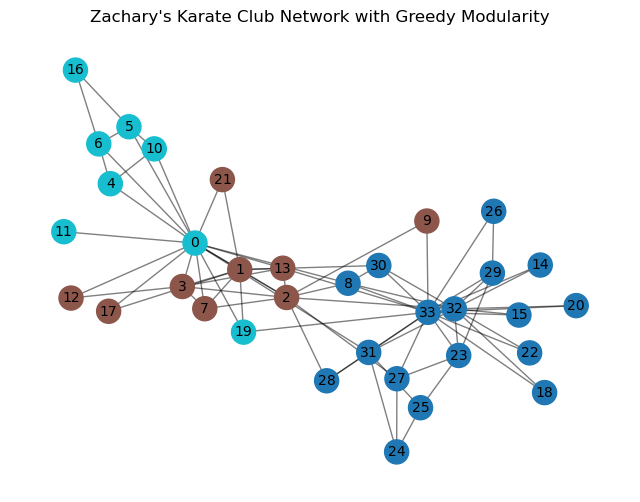

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.quality import modularity

# Load the Zachary's Karate Club network
G = nx.karate_club_graph()

# Extract communities using Greedy Modularity
communities = list(greedy_modularity_communities(G))

# Check the extracted communities
print("Communities:", communities)

# Calculate the overall modularity
modularity_value = modularity(G, communities)
print(f"Modularity of all communities = {modularity_value}")

# Create a dictionary to assign colors to nodes based on their community
node_color = {}
for idx, comm in enumerate(communities):
    for node in comm:
        node_color[node] = idx

# Create a dictionary for node labels (using node indices as labels)
node_labels = {node: node for node in G.nodes()}

# Get the layout for visualization (using spring layout here)
pos = nx.spring_layout(G)

# Draw the network
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_color=[node_color[node] for node in G.nodes()], cmap=plt.cm.tab10, node_size=300)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black', font_family='sans-serif')
plt.title("Zachary's Karate Club Network with Greedy Modularity")
plt.axis('off')
plt.show()


---

## Community Detection Using the Label Propagation Algorithm
This script allows for the visualization of network data and the comparison of community detection results using both the Greedy Modularity Optimization method and the Label Propagation Algorithm. **The Label Propagation Algorithm** is one of the methods for community detection in networks. **This algorithm starts with a small amount of labeled data, and each node gradually forms communities by updating its label based on a majority vote of the labels of its neighboring nodes.**

### Algorithm Overview
1. **Initialization**<br>
    ・Assign a unique label to each node (typically the node's ID).<br>
2. **Random Order Determination**<br>
    ・Determine the update order of the nodes randomly.<br>
3. **Label Update**<br>
    ・Process each node in the determined order.<br>
    ・Each node adopts the most frequent label among its neighboring nodes as its new label.<br>
    ・In the case of a tie, one label is chosen at random.<br>
4. **Check Stopping Conditions**<br>
    ・Check whether all nodes have adopted the most frequent label among their neighboring nodes.<br>
    ・Alternatively, check if the predefined maximum number of iterations has been reached.<br>
5. **Iteration**<br>
    ・If the stopping conditions are not met, repeat steps 2 to 4.<br>
6. **Community Identification**<br>
    ・Finally, nodes with the same label are identified as part of the same community.<br>
7. **Output Results**<br>
    ・The detected community structure is output.<br>

The Label Propagation Algorithm is intuitive and computationally efficient, making it well-suited for large-scale network data. However, the results can vary depending on the initial label assignments and the update order of the nodes, so it is important to understand the algorithm's characteristics when using it.

The script detects communities using the Label Propagation Algorithm and visualizes the results on a graph. By comparing the results with those from the Greedy Modularity Optimization method, the differences in the characteristics of the two algorithms can be observed.

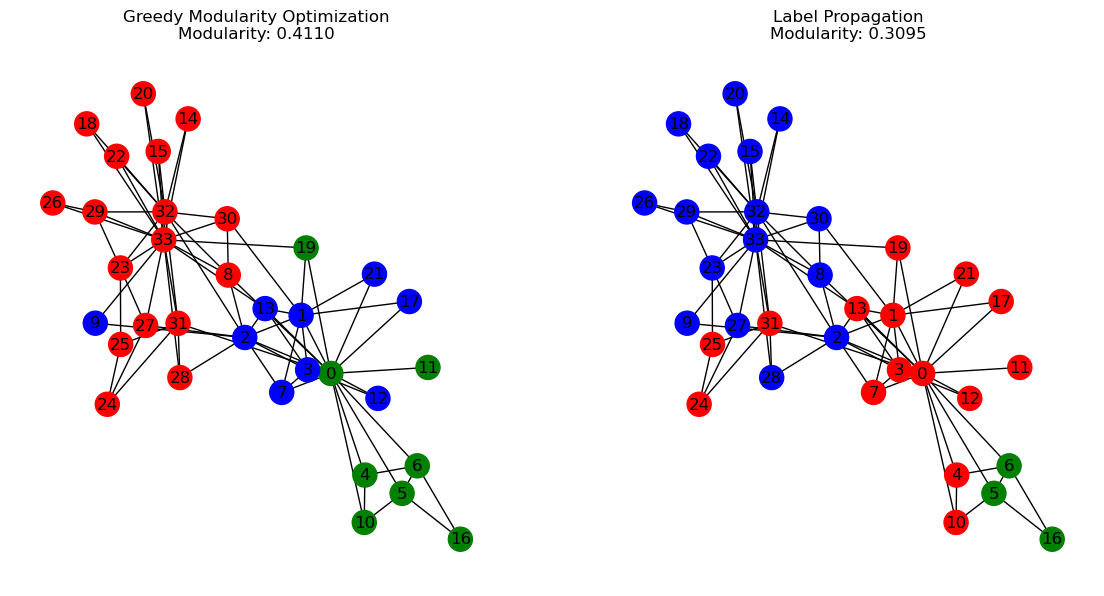

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities, label_propagation_communities
from networkx.algorithms.community import modularity

# Generate the Karate Club graph
G = nx.karate_club_graph()

# Define colors for the communities
colors = ['red', 'blue', 'green']

# Compute node positions using spring layout
pos = nx.spring_layout(G)

# Extract communities using Greedy Modularity Optimization
lst_m = greedy_modularity_communities(G)
modularity_m = modularity(G, lst_m)  # Calculate modularity value

# Initialize node colors (set all nodes to black)
color_map_m = ['black'] * nx.number_of_nodes(G)
counter = 0

# Assign colors to each community
for c in lst_m:
    for n in c:
        color_map_m[n] = colors[counter % len(colors)]
    counter += 1

# Detect communities using the Label Propagation Algorithm
lst_l = label_propagation_communities(G)
modularity_l = modularity(G, lst_l)  # Calculate modularity value

# Initialize node colors (set all nodes to black)
color_map_l = ['black'] * nx.number_of_nodes(G)
counter = 0

# Assign colors to each community
for c in lst_l:
    for n in c:
        color_map_l[n] = colors[counter % len(colors)]
    counter += 1

# Draw the graph
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Draw the results of the Greedy Modularity Optimization
axs[0].set_title(f'Greedy Modularity Optimization\nModularity: {modularity_m:.4f}')
nx.draw_networkx_edges(G, pos, ax=axs[0])
nx.draw_networkx_nodes(G, pos, node_color=color_map_m, ax=axs[0])
nx.draw_networkx_labels(G, pos, ax=axs[0])
axs[0].axis('off')

# Draw the results of the Label Propagation Algorithm
axs[1].set_title(f'Label Propagation\nModularity: {modularity_l:.4f}')
nx.draw_networkx_edges(G, pos, ax=axs[1])
nx.draw_networkx_nodes(G, pos, node_color=color_map_l, ax=axs[1])
nx.draw_networkx_labels(G, pos, ax=axs[1])
axs[1].axis('off')

plt.show()


---

## Girvan–Newman Algorithm
The **Girvan-Newman Algorithm** is a widely used method for identifying community structures within a network. This algorithm **divides the network based on <span style="color: red;">**edge betweenness centrality**</span> and maximizes the modularity** of each resulting sub-network.

**Betweenness centrality** is a measure that indicates how much a particular edge contributes to the shortest paths between different pairs of nodes in the network. In other words, the more an edge is included in the shortest paths between pairs of nodes, the higher its betweenness centrality. The Girvan-Newman algorithm progressively removes edges with the highest betweenness centrality to split the network into smaller communities.

Let’s explain how this algorithm works using a familiar example. Imagine you want to find friend groups in a school class. You observe the class and identify the most active conversations between students (edges). In the Girvan-Newman algorithm, these active conversations are considered as edges with high betweenness centrality, and they are prioritized for removal. By removing these connections, the class is gradually divided into smaller friend groups. Repeating this process reveals the overall structure of the class’s friend groups.

Here is a brief overview of the algorithm’s steps. First, **the entire network is treated as a single community**. Next, the betweenness centrality of all edges is calculated, and the **edge with the highest betweenness centrality is removed**. After the removal, betweenness centrality is recalculated, and the next edge to be removed is selected. This process is repeated until the network is split into smaller communities. In this way, the hierarchical community structure of the entire network is revealed.

The Girvan-Newman algorithm, with its hierarchical approach, extracts communities while considering the overall structure of the network. This allows for understanding the community structure at different scales and levels.

On the other hand, the Louvain method reallocates each node within the network to different communities through initial local optimization, aiming to increase local modularity. This method is characterized by efficiently moving nodes at each step, quickly approaching an optimal solution. Thus, it is suitable for large networks and can produce high-quality community structures in a short time. From a greedy perspective, the Girvan-Newman algorithm is more exploratory, evaluating a wide range of moves, whereas the Louvain method is more efficient and can rapidly find high-quality solutions.

Applications of the Girvan-Newman algorithm include the analysis of social networks. For instance, it is used to analyze user networks on platforms like Facebook and Twitter to discover natural communities or groups. It is also employed in gene network analysis, the analysis of cooperation between companies, understanding information diffusion patterns, and other areas. This helps to gain a deep understanding of the network structure and develop efficient strategies.

### Note
The GN (Girvan-Newman) benchmark is different from the Girvan-Newman algorithm.  
**Girvan-Newman Algorithm**<br>
This is an algorithm for detecting communities within a network. It analyzes the structure of the network using edge betweenness centrality and identifies communities (modules) based on this analysis. Edge betweenness centrality measures how much each edge contributes to the shortest paths between different pairs of nodes in the network.<br>

**GN (Girvan-Newman) Benchmark**<br>
This is a benchmark used in network science and computer science to evaluate the performance of network algorithms. The GN benchmark generates artificial networks with specific properties (e.g., known community structure) to test the efficiency and accuracy of algorithms. While named after Girvan and Newman, it is not directly related to the specific algorithm.<br>

In short, the Girvan-Newman algorithm refers to a specific network analysis method, whereas the GN benchmark refers to an artificial network generation method used for algorithm evaluation and comparison.<br>

Maximum modularity: 0.3849721706864564 (Step 3)
Full modularity sequence: [0.3476602762317048, 0.3423192968647514, 0.3580611307884035, 0.3849721706864564, 0.37578006409175235, 0.3594760218136841, 0.3470699574595678, 0.33324900208017094, 0.31344052772624204, 0.3122598901819681, 0.30368621277712193, 0.29429733325837226, 0.28271584115739956, 0.27116245947414774, 0.2544648713479881, 0.23975375274076566, 0.2268979217031164, 0.22299057363992417, 0.20056783043796028, 0.18696238826108952, 0.1609134011731414, 0.1428102921609415, 0.11768894885778003, 0.11088622776934465, 0.10076647738985402, 0.08837915331421826, 0.0562395757200952, 0.04398343359382321, 0.011515901126290735, -0.0035044320758606464, -0.03105264144225183, -0.04655085174565694, -0.05110473941642772]


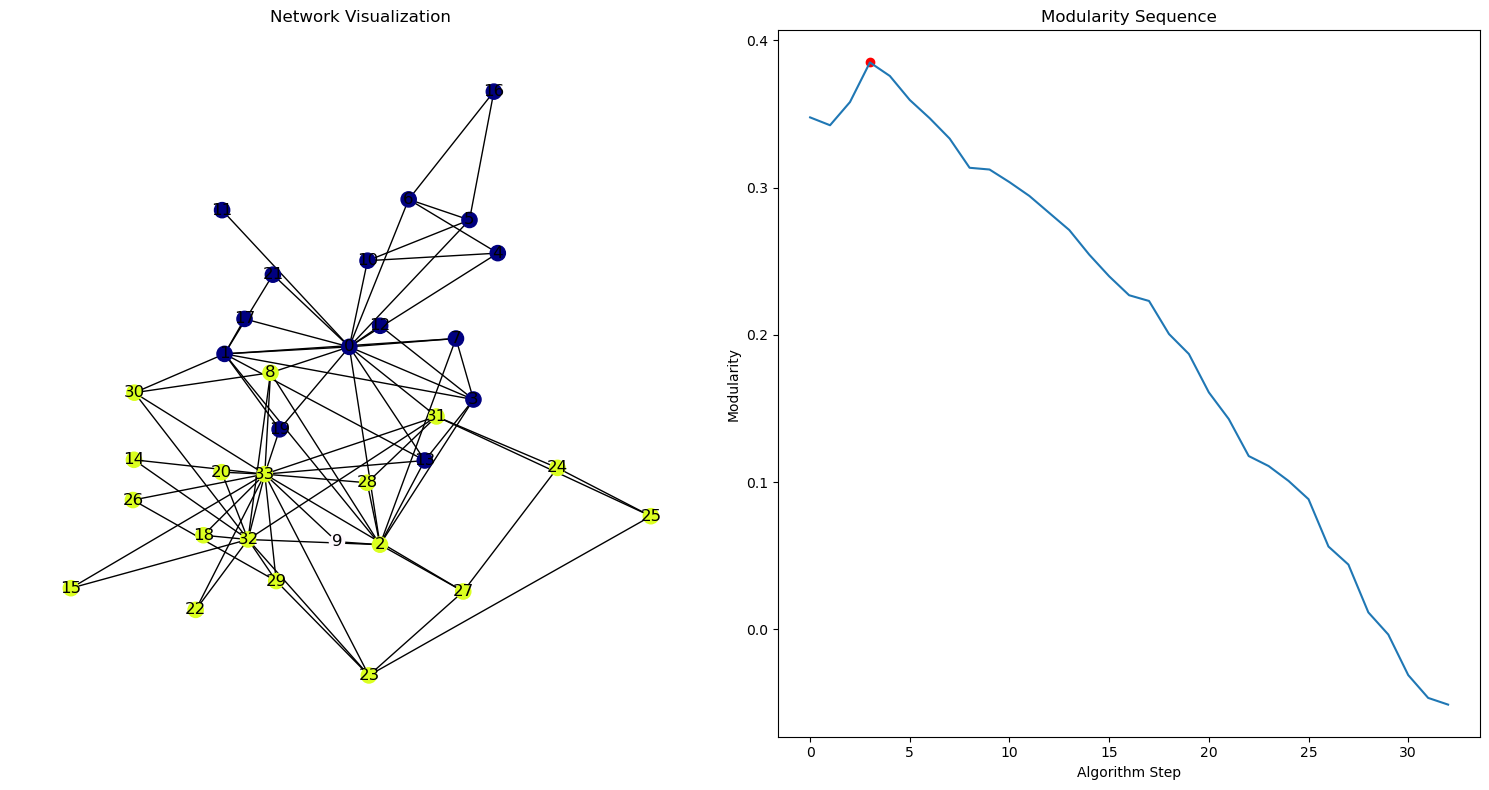

In [10]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import pandas as pd

# Generate the Karate Club graph
G_karate = nx.karate_club_graph()

# Create a DataFrame with node attributes
carac = pd.DataFrame({'ID': G_karate.nodes(), 'myvalue': [0] * len(G_karate.nodes())})

# Extract communities using the Girvan-Newman algorithm
communities_generator = community.girvan_newman(G_karate)
# Get the top-level communities
top_level_communities = next(communities_generator)
# Get the next level of communities
next_level_communities = next(communities_generator)

# Set community numbers as node attributes and draw the network
for m in range(len(next_level_communities)):
    for n in next_level_communities[m]:
        carac.loc[carac.ID == n, 'myvalue'] = m

# Set the layout (slightly expand the distance between nodes)
pos = nx.kamada_kawai_layout(G_karate)

# Define a function to calculate modularity
def modularity(G, communities):
    return community.modularity(G, communities)

# Apply the Girvan-Newman algorithm and calculate modularity
partition_sequence = list(community.girvan_newman(G_karate))
modularity_sequence = [modularity(G_karate, p) for p in partition_sequence]

# Find the step with the highest modularity
max_modularity = max(modularity_sequence)
max_step = modularity_sequence.index(max_modularity)

# Output key points to the console
print(f"Maximum modularity: {max_modularity} (Step {max_step})")
print(f"Full modularity sequence: {modularity_sequence}")

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# Draw the network
ax[0].set_title('Network Visualization')
nx.draw(G_karate, pos, node_color=carac['myvalue'], node_size=120, with_labels=True, cmap=plt.cm.gist_ncar, ax=ax[0])

# Plot the modularity sequence
ax[1].set_title('Modularity Sequence')
ax[1].plot(modularity_sequence)
ax[1].set_ylabel('Modularity')
ax[1].set_xlabel('Algorithm Step')
ax[1].scatter(max_step, max_modularity, color='red')  # Highlight the point of maximum modularity

plt.tight_layout()
plt.show()


---

## Comprehensive Community Detection Using the GN Method
This script performs community detection using the same approach as the original GN method. The key difference lies in the nature of the datasets being used.<br>
The Karate Club graph includes a predefined community structure. Based on this predefined information, the modularity of the divided communities is evaluated. On the other hand, the *Les Misérables* dataset does not contain predefined community information.<br>

Therefore, in this script, the Girvan-Newman algorithm is used to divide the network structure within the dataset based on the network's properties, and the modularity of this division is calculated without using any predefined community information.

Maximum modularity: 0.3849721706864564 (Step 3)
Full modularity sequence: [0.3476602762317048, 0.3423192968647514, 0.3580611307884035, 0.3849721706864564, 0.37578006409175235, 0.3594760218136841, 0.3470699574595678, 0.33324900208017094, 0.31344052772624204, 0.3122598901819681, 0.30368621277712193, 0.29429733325837226, 0.28271584115739956, 0.27116245947414774, 0.2544648713479881, 0.23975375274076566, 0.2268979217031164, 0.22299057363992417, 0.20056783043796028, 0.18696238826108952, 0.1609134011731414, 0.1428102921609415, 0.11768894885778003, 0.11088622776934465, 0.10076647738985402, 0.08837915331421826, 0.0562395757200952, 0.04398343359382321, 0.011515901126290735, -0.0035044320758606464, -0.03105264144225183, -0.04655085174565694, -0.05110473941642772]


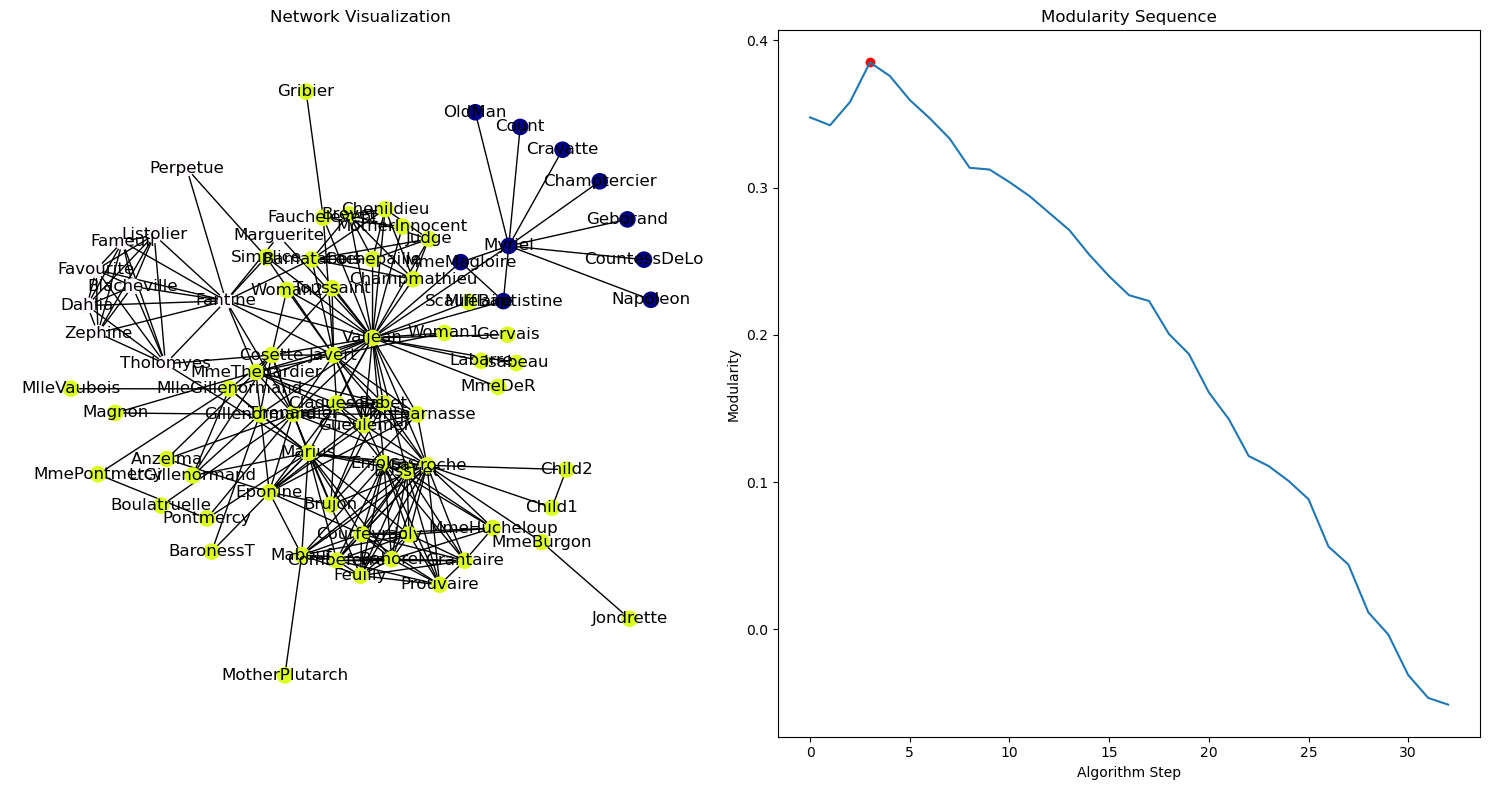

In [11]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import pandas as pd

# Path to the GML file
gml_file = r'D:\Python\NetworkX\lesmis\lesmis.gml'

# Load the GML file
G = nx.read_gml(gml_file)

# Create a DataFrame with node attributes
carac = pd.DataFrame({'ID': G.nodes(), 'myvalue': [0] * len(G.nodes())})

# Extract communities using the Girvan-Newman algorithm
communities_generator = community.girvan_newman(G)
# Get the top-level communities
top_level_communities = next(communities_generator)
# Get the next level of communities
next_level_communities = next(communities_generator)

# Set community numbers as node attributes and draw the network
for m in range(len(next_level_communities)):
    for n in next_level_communities[m]:
        carac.loc[carac.ID == n, 'myvalue'] = m

# Set the layout (expand the distance between nodes slightly)
pos = nx.kamada_kawai_layout(G)

# Generate the Karate Club graph
G_karate = nx.karate_club_graph()

# Define a function to calculate modularity
def modularity(G, communities):
    return community.modularity(G, communities)

# Apply the Girvan-Newman algorithm and calculate modularity
partition_sequence = list(community.girvan_newman(G_karate))
modularity_sequence = [modularity(G_karate, p) for p in partition_sequence]

# Find the step with the highest modularity
max_modularity = max(modularity_sequence)
max_step = modularity_sequence.index(max_modularity)

# Output key points to the console
print(f"Maximum modularity: {max_modularity} (Step {max_step})")
print(f"Full modularity sequence: {modularity_sequence}")

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# Draw the network
ax[0].set_title('Network Visualization')
nx.draw(G, pos, node_color=carac['myvalue'], node_size=120, with_labels=True, cmap=plt.cm.gist_ncar, ax=ax[0])

# Plot the modularity sequence
ax[1].set_title('Modularity Sequence')
ax[1].plot(modularity_sequence)
ax[1].set_ylabel('Modularity')
ax[1].set_xlabel('Algorithm Step')
ax[1].scatter(max_step, max_modularity, color='red')  # Highlight the point of maximum modularity

plt.tight_layout()
plt.show()


---

## Φ-method
The **Φ-method** is one of the approaches for evaluating the structural balance of a network, with a particular focus on small structures (triads). This method involves extracting specific parts of the network and assessing their properties.

In other words, the Φ-method is a technique for evaluating the stability and balance of a network. For example, in a project team where you serve as the leader, you may have cooperative members (positive relationships) and others who sometimes disagree (negative relationships). Using the Φ-method, you can quantify the relationships between members and evaluate the overall balance of the team.

In a family setting, it considers both positive interactions (enjoyable moments) and negative interactions (arguments) to assess the overall balance of the household. The Φ-method takes into account the influence of each link (positive or negative) and quantifies the balance of the entire network.
Additionally, it can be applied to analyze the friendliness and conflicts between users on social networks to assess the health of the network. The method is also applicable in various fields, including international relations and intra-company human relations.

The calculation method evaluates the positive or negative impact of each link and quantifies the stability of the entire network.

### Algorithm Overview
1. **Initialization**<br>
    ・Each node is treated as an independent community.<br>
    ・Set parameters for calculating the Φ-value, which serves as a measure of community quality.<br>
2. **Calculation of Φ-value**<br>
    ・Calculate the Φ-value of each community based on the current community structure.<br>
    ・Also, calculate the Φ-value for the entire network.<br>
3. **Community Merging**<br>
    ・For each pair of adjacent communities, calculate the change in Φ-value if they were to merge.<br>
    ・Select the pair with the maximum increase in Φ-value and merge them.<br>
4. **Update**<br>
    ・Update the Φ-value based on the new community structure.<br>
5. **Iteration**<br>
    ・Repeat steps 3 and 4 until no further increase in Φ-value is observed, or a predefined stopping condition is reached.<br>
6. **Building a Hierarchical Structure**<br>
    ・Record the merging process to build a hierarchical structure of communities.<br>
7. **Selection of the Optimal Cut**<br>
    ・From the hierarchical structure, select the level with the optimal Φ-value.<br>
8. **Output the Results**<br>
    ・Output the community structure at the selected level as the final result.<br>

The key feature of the Φ-method is its optimization of the Φ-value, which balances internal density within communities and external sparsity. This allows for the detection of more natural community structures. Additionally, since it provides a hierarchical structure, communities at different granularities can be analyzed.

However, since this algorithm is relatively new, further research is required to compare its effectiveness and efficiency with more established methods.

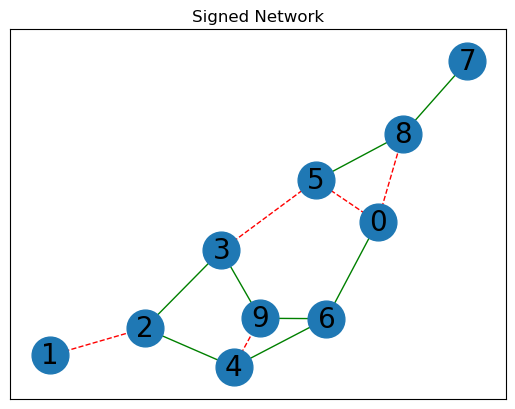

Φ-value of the network: 0.5


In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a signed network
def create_signed_network(num_nodes, num_edges):
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    for _ in range(num_edges):
        u, v = np.random.choice(num_nodes, 2, replace=False)
        sign = np.random.choice([1, -1])
        G.add_edge(u, v, sign=sign)
    return G

# Plot the signed network
def plot_signed_network(G):
    pos = nx.spring_layout(G)
    edges = G.edges(data=True)
    positive_edges = [(u, v) for u, v, d in edges if d['sign'] > 0]
    negative_edges = [(u, v) for u, v, d in edges if d['sign'] < 0]

    nx.draw_networkx_nodes(G, pos, node_size=700)
    nx.draw_networkx_edges(G, pos, edgelist=positive_edges, edge_color='g', style='solid')
    nx.draw_networkx_edges(G, pos, edgelist=negative_edges, edge_color='r', style='dashed')
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

    plt.title('Signed Network')
    plt.show()

# Implement the Φ-method
def phi_method(G):
    triads = list(nx.enumerate_all_cliques(G))
    triads = [triad for triad in triads if len(triad) == 3]
    
    total_triads = len(triads)
    balanced_triads = 0

    for triad in triads:
        subgraph = G.subgraph(triad)
        signs = [subgraph[u][v]['sign'] for u, v in subgraph.edges()]
        
        # Consider a triad balanced if it has 3 positive edges or 1 positive edge and 2 negative edges
        if signs.count(1) == 3 or signs.count(-1) == 2:
            balanced_triads += 1

    phi_value = balanced_triads / total_triads if total_triads > 0 else 0
    return phi_value

# Main part
num_nodes = 10
num_edges = 15
G = create_signed_network(num_nodes, num_edges)
plot_signed_network(G)
phi_value = phi_method(G)
print(f"Φ-value of the network: {phi_value}")


---

## Balance Evaluation of Signed Networks: Φ-method and Pairwise DoB Measurement
This script aims to evaluate the balance of a **signed network**, where the edges of the graph are labeled with positive or negative signs. The script uses the following methods to **assess both the overall and local balance of the network**.<br>

### Script Structure and Methods
**1. Creation of Signed Network**<br>
・The function `create_signed_network` randomly generates a signed network with the specified number of nodes (`num_nodes`) and edges (`num_edges`). Each edge is randomly assigned a sign of 1 (positive) or -1 (negative).<br>

**2. Plotting the Signed Network**<br>
・The function `plot_signed_network` plots the generated network. Positive edges are drawn as solid green lines, while negative edges are drawn as dashed red lines.<br>

**3. Implementation of the Φ-method**<br>
・The function `phi_method` evaluates the balance of all triads (subgraphs of three nodes) in the network. If a triad contains three positive edges or two positive edges and one negative edge, the triad is considered balanced. The proportion of balanced triads is calculated and returned as the Φ-value (Phi-value).<br>

**4. Implementation of Pairwise DoB Measurement**<br>
・The function `pairwise_DoB_measure` evaluates whether all node pairs in the network have common neighbors with the same sign. The proportion of node pairs with matching signs is calculated and returned as the DoB-value (Degree of Balance value).<br>

**5. Output of Results**<br>
・In the main part, a signed network is generated and plotted using the above functions, and then the Φ-value and DoB-value are calculated.<br>
・The results are output to the console. If the Φ-value exceeds 0.5, the network is considered to be globally balanced, and if the DoB-value exceeds 0.5, many node pairs are considered to be locally balanced.<br>


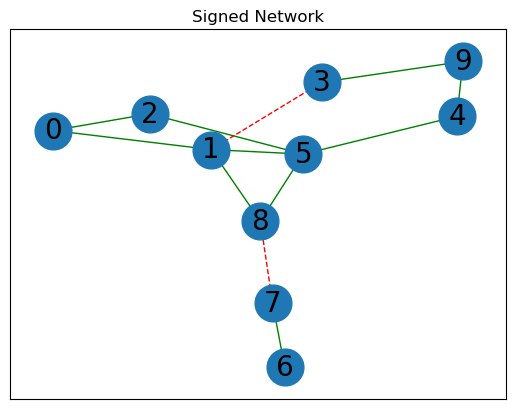

Triad: [1, 5, 8], Signs: [1, 1, 1]
Pair: (0, 3), Common Neighbor: 1, Same Sign: False
Pair: (0, 5), Common Neighbor: 1, Same Sign: True
Pair: (0, 5), Common Neighbor: 2, Same Sign: True
Pair: (0, 8), Common Neighbor: 1, Same Sign: True
Pair: (1, 2), Common Neighbor: 0, Same Sign: True
Pair: (1, 2), Common Neighbor: 5, Same Sign: True
Pair: (1, 4), Common Neighbor: 5, Same Sign: True
Pair: (1, 7), Common Neighbor: 8, Same Sign: False
Pair: (1, 9), Common Neighbor: 3, Same Sign: False
Pair: (2, 4), Common Neighbor: 5, Same Sign: True
Pair: (2, 8), Common Neighbor: 5, Same Sign: True
Pair: (3, 4), Common Neighbor: 9, Same Sign: True
Pair: (3, 5), Common Neighbor: 1, Same Sign: False
Pair: (3, 8), Common Neighbor: 1, Same Sign: False
Pair: (4, 8), Common Neighbor: 5, Same Sign: True
Pair: (5, 9), Common Neighbor: 4, Same Sign: True
Pair: (5, 7), Common Neighbor: 8, Same Sign: False
Pair: (6, 8), Common Neighbor: 7, Same Sign: False
Φ-value of the network: 1.0
Pairwise DoB value of the netw

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a signed network
def create_signed_network(num_nodes, num_edges):
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    for _ in range(num_edges):
        u, v = np.random.choice(num_nodes, 2, replace=False)
        sign = np.random.choice([1, -1])
        G.add_edge(u, v, sign=sign)
    return G

# Plot the signed network
def plot_signed_network(G):
    pos = nx.spring_layout(G)
    edges = G.edges(data=True)
    positive_edges = [(u, v) for u, v, d in edges if d['sign'] > 0]
    negative_edges = [(u, v) for u, v, d in edges if d['sign'] < 0]

    nx.draw_networkx_nodes(G, pos, node_size=700)
    nx.draw_networkx_edges(G, pos, edgelist=positive_edges, edge_color='g', style='solid')
    nx.draw_networkx_edges(G, pos, edgelist=negative_edges, edge_color='r', style='dashed')
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

    plt.title('Signed Network')
    plt.show()

# Implement the Φ-method
def phi_method(G):
    triads = list(nx.enumerate_all_cliques(G))
    triads = [triad for triad in triads if len(triad) == 3]
    
    total_triads = len(triads)
    balanced_triads = 0

    for triad in triads:
        subgraph = G.subgraph(triad)
        signs = [subgraph[u][v]['sign'] for u, v in subgraph.edges()]
        print(f"Triad: {triad}, Signs: {signs}")
        
        # Consider a triad balanced if it has 3 positive edges or 2 positive edges and 1 negative edge
        if signs.count(1) == 3 or (signs.count(1) == 2 and signs.count(-1) == 1):
            balanced_triads += 1

    phi_value = balanced_triads / total_triads if total_triads > 0 else 0
    return phi_value

# Implement pairwise DoB measurement
def pairwise_DoB_measure(G):
    total_pairs = 0
    same_sign_pairs = 0

    for u, v in nx.non_edges(G):
        common_neighbors = set(G.neighbors(u)).intersection(G.neighbors(v))
        for neighbor in common_neighbors:
            if G[u][neighbor]['sign'] == G[v][neighbor]['sign']:
                same_sign_pairs += 1
            total_pairs += 1
            print(f"Pair: ({u}, {v}), Common Neighbor: {neighbor}, Same Sign: {G[u][neighbor]['sign'] == G[v][neighbor]['sign']}")

    DoB_value = same_sign_pairs / total_pairs if total_pairs > 0 else 0
    return DoB_value

# Main part
num_nodes = 10
num_edges = 15
G = create_signed_network(num_nodes, num_edges)
plot_signed_network(G)
phi_value = phi_method(G)
DoB_value = pairwise_DoB_measure(G)

# Output detailed results
print(f"Φ-value of the network: {phi_value}")
print(f"Pairwise DoB value of the network: {DoB_value}")

# Show explanations based on the calculated values
if phi_value > 0.5:
    print("The network is overall well-balanced according to the Φ-value.")
else:
    print("The network is not well-balanced according to the Φ-value.")

if DoB_value > 0.5:
    print("A majority of node pairs share neighbors with the same sign, indicating local balance.")
else:
    print("Many node pairs do not share neighbors with the same sign, indicating local imbalance.")


The results provided by the script show an analysis of a signed network using the Φ-method and the Pairwise Degree of Balance (DoB) measurement. Here's an explanation of the results:

1. **Triad Balance Evaluation:**
   - The triad `[1, 5, 8]` has all positive edges (`Signs: [1, 1, 1]`), indicating that this triad is well-balanced according to the criteria of the Φ-method. In this method, a triad is considered balanced if all edges are positive or if two edges are positive and one is negative.
   - The **Φ-value of the network is 1.0**, which means that **all triads in the network are balanced**. This suggests that the overall network structure is stable and well-balanced based on the evaluation of its triads.

2. **Pairwise DoB Measurement:**
   - The script evaluates pairs of nodes that do not have a direct edge but share common neighbors. It checks whether the edges between the node pairs and their common neighbors have the same sign.
   - For example, in the pair `(0, 3)` with a common neighbor `1`, the edge signs are not the same (`Same Sign: False`), while for the pair `(0, 5)` with a common neighbor `1`, the signs match (`Same Sign: True`).
   - The **Pairwise DoB value of the network is 0.6111**, indicating that **61.1% of node pairs share common neighbors with edges of the same sign**. This suggests that a majority of node pairs exhibit local balance in the network, which means that many pairs of nodes have consistent relationships with their shared neighbors.

3. **Interpretation of the Results:**
   - The **Φ-value of 1.0** confirms that the network is globally well-balanced, meaning that all the triads analyzed conform to the balance criteria.
   - The **Pairwise DoB value of 0.6111** further suggests that the network exhibits a significant level of local balance, as most node pairs have neighbors with consistent relationships (either all positive or all negative).

Overall, the results indicate that this signed network is highly balanced both globally (Φ-value) and locally (DoB value), with most triads and node pairs reflecting stable and consistent relationships.

# Others
## Edge Betweenness-based Methods
The Girvan-Newman algorithm divides a network by removing edges based on their betweenness centrality. Other methods using a similar approach also exist. For example, the GN method (Girvan-Newman method) is a variant of the Girvan-Newman algorithm that splits the network based on edge betweenness centrality.

## Modularity Optimization Methods
Modularity optimization methods aim to **maximize the difference between the internal connectivity of edges within the network and the expected connectivity**. The Louvain method belongs to this category.

## Recursive Partitioning
Recursive Partitioning allows for the division of networks into communities of varying sizes and densities. This method recursively partitions the network, extracting communities with different scales and structures. By adjusting the criteria and parameters for partitioning, it is possible to focus on extracting communities of specific sizes or densities, while considering the overall structure of the network. This flexibility enables the comprehensive extraction of various communities within the network.